In [42]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('vcd_csv.csv')

In [44]:
df

,Cycle,Global_Distance,exdes_tb.exdes_top.m_axis_tvalid,d_exdes_tb.exdes_top.m_axis_tvalid,exdes_tb.exdes_top.m_axis_tlast,d_exdes_tb.exdes_top.m_axis_tlast,exdes_tb.exdes_top.m_axis_tready,d_exdes_tb.exdes_top.m_axis_tready
0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
12253,12253,0,1,0,0,0,0,0
12254,12254,0,1,0,0,0,0,0
12255,12255,0,1,0,0,0,0,0
12256,12256,0,1,0,0,0,0,0


In [ ]:
df_necessary = df.drop(columns=['Cycle', 'Global_Distance', 'd_exdes_tb.exdes_top.m_axis_tready', 'd_exdes_tb.exdes_top.m_axis_tvalid', 'd_exdes_tb.exdes_top.m_axis_tlast'])

In [29]:
df_necessary

,Cycle,exdes_tb.exdes_top.s_axis_tready,exdes_tb.exdes_top.s_axis_tvalid,exdes_tb.exdes_top.s_axis_tlast,exdes_tb.exdes_top.m_axis_tvalid,exdes_tb.exdes_top.m_axis_tlast,exdes_tb.exdes_top.m_axis_tready
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,2,0,0,0,0,0,0
3,3,0,0,0,0,0,0
4,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...
209685,209685,1,0,0,1,0,1
209686,209686,1,0,0,1,0,1
209687,209687,1,0,0,1,0,1
209688,209688,1,0,0,1,0,1


In [30]:
# Find all indices where column 'A' has the value 3
indices = df_necessary[df_necessary['exdes_tb.exdes_top.s_axis_tvalid'] == 1].index

print(indices)  # Outputs the indices where 'A' has the value 3


Index([   699,    700,    701,    702,    703,    704,    705,    706,    707,
          708,
       ...
       209639, 209640, 209641, 209642, 209643, 209644, 209645, 209646, 209647,
       209648],
      dtype='int64', length=104480)


In [31]:
df_final = df_necessary.drop(columns=['Cycle', 'exdes_tb.exdes_top.m_axis_tvalid',  'exdes_tb.exdes_top.m_axis_tready', 'exdes_tb.exdes_top.m_axis_tlast'])

In [32]:
df_final

,exdes_tb.exdes_top.s_axis_tready,exdes_tb.exdes_top.s_axis_tvalid,exdes_tb.exdes_top.s_axis_tlast
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
209685,1,0,0
209686,1,0,0
209687,1,0,0
209688,1,0,0


In [33]:

# Window size (64 consecutive samples)
window_size = 64

# Number of windows
num_windows = len(df_final) // window_size

# List to store the resulting matrices
matrices = []

# Sliding window approach
for i in range(num_windows):
    # Extract a window of 64 consecutive rows for each column
    window_df = df_final.iloc[i * window_size: (i + 1) * window_size]
    # Convert the window to a matrix (numpy array)
    window_matrix = window_df.values
    matrices.append(window_matrix)

# Displaying the number of windows and the shape of one matrix
print(f"Total number of matrices: {len(matrices)}")
print(f"Shape of each matrix: {matrices[0].shape}")

Total number of matrices: 3276
Shape of each matrix: (64, 3)


In [34]:
matrices

[array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 

c:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Matrix 1 is in class 0
Matrix 2 is in class 0
Matrix 3 is in class 0
Matrix 4 is in class 0
Matrix 5 is in class 0
Matrix 6 is in class 0
Matrix 7 is in class 0
Matrix 8 is in class 0
Matrix 9 is in class 0
Matrix 10 is in class 0
Matrix 11 is in class 0
Matrix 12 is in class 2
Matrix 13 is in class 2
Matrix 14 is in class 2
Matrix 15 is in class 2
Matrix 16 is in class 2
Matrix 17 is in class 2
Matrix 18 is in class 4
Matrix 19 is in class 1
Matrix 20 is in class 0
Matrix 21 is in class 0
Matrix 22 is in class 5
Matrix 23 is in class 4
Matrix 24 is in class 1
Matrix 25 is in class 0
Matrix 26 is in class 0
Matrix 27 is in class 5
Matrix 28 is in class 4
Matrix 29 is in class 1
Matrix 30 is in class 0
Matrix 31 is in class 0
Matrix 32 is in class 5
Matrix 33 is in class 4
Matrix 34 is in class 1
Matrix 35 is in class 0
Matrix 36 is in class 0
Matrix 37 is in class 5
Matrix 38 is in class 4
Matrix 39 is in class 1
Matrix 40 is in class 0
Matrix 41 is in class 0
Matrix 42 is in class 5
M

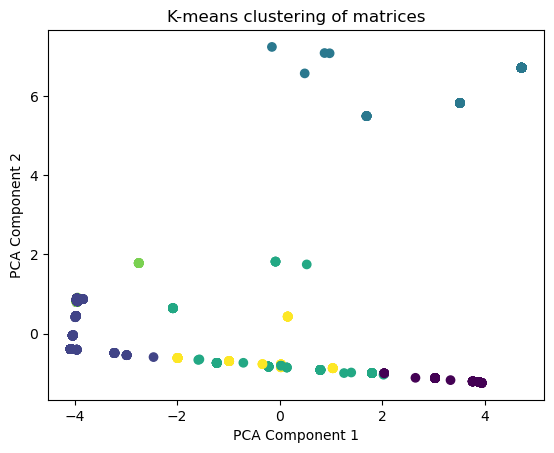

In [37]:
data_points = [matrix.flatten() for matrix in matrices]

# Step 2: Perform K-means clustering (with K=2 classes)
kmeans = KMeans(n_clusters=6)
kmeans.fit(data_points)

# Step 3: Get the class labels for each matrix
labels = kmeans.labels_

# Print the class for each matrix
for i, label in enumerate(labels):
    print(f"Matrix {i+1} is in class {label}")

# Optional: Visualize the clustering (if you want to visualize clusters on a 2D plane)
# You can use PCA or t-SNE to reduce the data to 2D for visualization
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_points)

# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.title('K-means clustering of matrices')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [38]:
from sklearn.metrics import silhouette_score

# After fitting the KMeans model
score = silhouette_score(data_points, kmeans.labels_)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.6830314934269549
